# TP0: Introducción a Python para DSP

Este trabajo práctico tiene como objetivo familiarizarte con la generación y análisis básico de señales usando **Python puro**, **NumPy** y **SciPy**.

## Objetivos
1. Definir funciones para generar señales básicas en Python puro (sin bibliotecas externas).
2. Generar señales usando bibliotecas como **NumPy** y **SciPy**.
3. Comprender la diferencia entre listas y arrays, y el beneficio del vectorizado.
4. Practicar operaciones básicas: encontrar máximos y mínimos en señales.


## Ejercicio 1: Señal cuadrada en Python puro

**Tarea:** Crea una función que genere una señal cuadrada de longitud `N` con los primeros `k` valores en `0` y los siguientes `k` en `1`.

**Indicaciones:**
- Usa bucles `for`.
- Devuelve la señal como una lista.
- Muestra la lista y grafícala usando `matplotlib`.


[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]


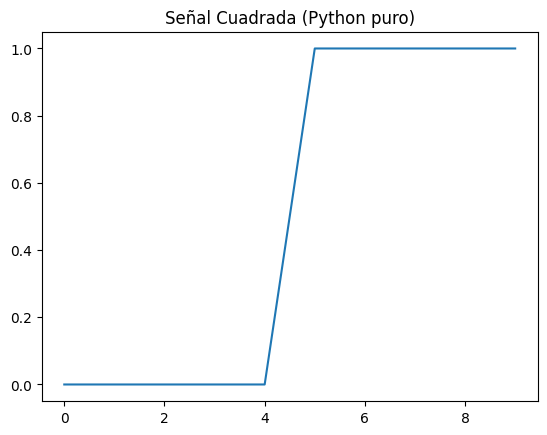

In [ ]:
import matplotlib.pyplot as plt

def generar_senal_cuadrada(N, k):
    senial = []
    for i in range(k):
        senial.append(0)
    for i in range(k):
        senial.append(1)
    return senial

senal_cuad = generar_senal_cuadrada(10, 5)
print(senal_cuad)
plt.title('Señal Cuadrada (Python puro)')
plt.plot(senal_cuad)
plt.show()

## Ejercicio 2: Señal triangular en Python puro

**Tarea:** Crea una función que genere una señal triangular que suba desde `0` hasta `M` y luego baje a `0`.

**Indicaciones:**
- Usa bucles `for`.
- Devuelve la lista y grafícala.


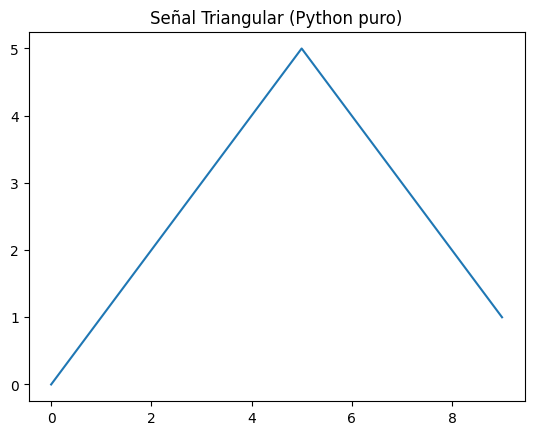

In [ ]:
def generar_senal_triangular(M):
    senial = []
    for i in range(M):
        senial.append(i)
    for i in range(M, 0, -1):
        senial.append(i)
    return senial

senal_tria = generar_senal_triangular(5)
plt.title('Señal Triangular (Python puro)')
plt.plot(senal_tria)
plt.show()

## Ejercicio 3: Delta de Dirac en Python puro

**Tarea:** Implementa la función `generar_delta_dirac(longitud, posicion)` que devuelve una lista de ceros con un único `1` en la posición indicada.

**Prueba la función** para `longitud = 10` y `posición = 5`.


In [ ]:
def generar_delta_dirac(cantidad, pos):
    if pos >= cantidad:
        return 'Error: posición fuera de rango'
    delta = [0]*cantidad
    delta[pos] = 1
    return delta

print(generar_delta_dirac(10,5))
plt.plot(senal_dirac)
plt.show()

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


## Ejercicio 4: Generación con NumPy/SciPy

Repite los ejercicios anteriores usando **NumPy/SciPy** y grafíca las señales junto con su **base de tiempo** (`t`) generada con `np.linspace()` o `np.arange()`.

**Pregunta:** ¿Cuál es la diferencia entre usar `linspace` y `arange`?

**Pistas:**
- Señal cuadrada: `sig.square()`.
- Señal senoidal: `np.sin()`.
- Señal triangular: `sig.sawtooth()`
- Señal delta de dirac: `np.dirac()` (o `np.concatenate()` con `zeros` y `ones`).


In [ ]:
¿Cuál es la diferencia entre usar linspace y arange? la diferencia radica en el tercer argumento de las funciones

¿Cuál es la diferencia entre usar linspace y arange?
La diferencia radica en el tercer argumento de las funciones. Para el caso de linspace el tercer argumento indica el paso entre valores por ejemplo saltos de 0,1 en cambio para arange el tercer argumento indica la cantidad de puntos que se desea tener entre el valor minimo y maximo por ejemplo 100 puntos si es entre 0 y 1 se tendran 100 puntos con distancia 0,01, si es entre 0 y 2 se tendran 100 puntos con distancia 0,02.

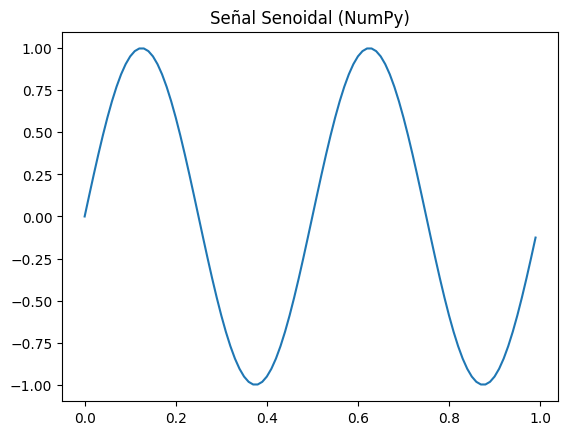

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Señal senoidal con NumPy
frec = 2
f_muestreo = 100
t = np.arange(0, 1, 1/f_muestreo)
senal_seno = np.sin(2 * np.pi * frec * t)
plt.title('Señal Senoidal (NumPy)')
plt.plot(t, senal_seno)
plt.show()

[0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]


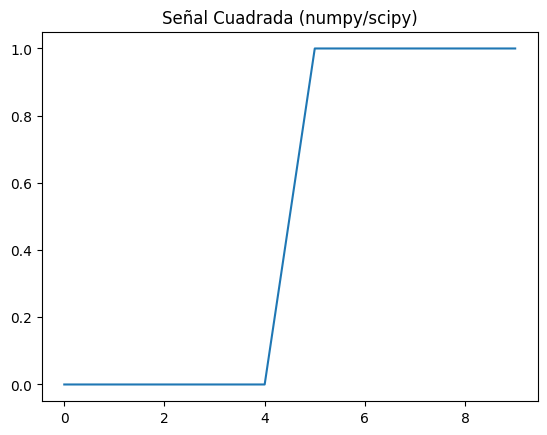

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

def generar_senal_cuadrada(N, k):
  t = np.arange(0, N, 1)   # base de tiempo continua
  pulso = k/N
  senal_cuad = 0.5*(1 - signal.square(2*t/np.pi, pulso))  # señal cuadrada
  return senal_cuad


senal_cuad = generar_senal_cuadrada(10, 5)
print(senal_cuad)
plt.title('Señal Cuadrada (numpy/scipy)')
plt.plot(senal_cuad)
plt.show()


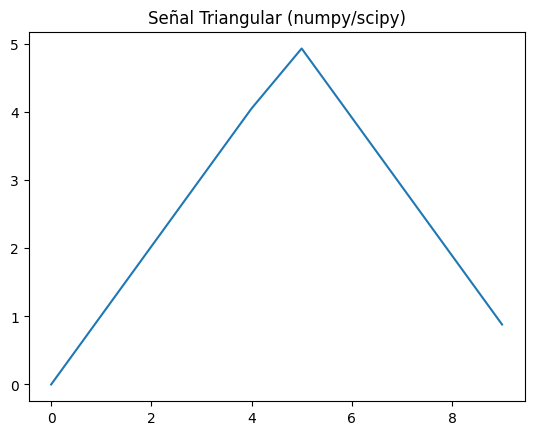

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal as sig

def generar_senal_triangular(M):
  t = np.arange(0, 10, 1)
  senal_tria = M/2*(sig.sawtooth(2*t/np.pi, 0.5) + 1)
  return senal_tria

senal_tria = generar_senal_triangular(5)
plt.title('Señal Triangular (numpy/scipy)')
plt.plot(senal_tria)
plt.show()

#https://docs.scipy.org/doc/scipy/reference/signal.html

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


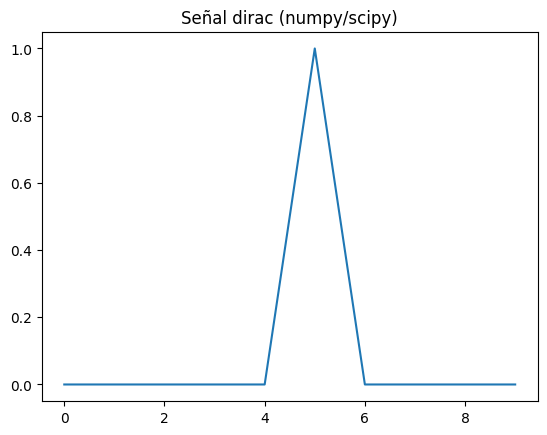

In [ ]:
import matplotlib.pyplot as plt
from scipy import signal

def generar_delta_dirac(cantidad, pos):
  senal_dirac = np.concatenate([np.zeros(pos), [1], np.zeros(cantidad - pos - 1)])  # forma triangular
  return senal_dirac

senal_dirac= generar_delta_dirac(10,5)
print(senal_dirac)

plt.title('Señal dirac (numpy/scipy)')
plt.plot(senal_dirac)
plt.show()



## Ejemplo: Señal cuadrada con `scipy.signal`


## Ejercicio 6: Máximos y mínimos

Encuentra el valor máximo y mínimo de una señal y sus posiciones:

- Primero con Python puro (listas y bucles).
- Luego con NumPy (`np.max`, `np.min`, `np.argmax`, `np.argmin`).


In [ ]:
# Señal de ejemplo
senal = [5, 7, 0, 20, -1, 5, 8, 0, 3]

# Sin NumPy (Python puro)
max_val = senal[0]
min_val = senal[0]
max_pos = 0
min_pos = 0

for i in range(len(senal))#bucle
    if senal[i] > max_val:
        max_val = senal[i]
        max_pos = i
    if senal[i] < min_val:
        min_val = senal[i]
        min_pos = i

print(f"Máximo: {max_val} en posición {max_pos}")
print(f"Mínimo: {min_val} en posición {min_pos}")



Máximo: 20 en posición 3
Mínimo: -1 en posición 4


In [ ]:
# Con NumPy -

import numpy as np

senal_np = np.array(senal)

max_val_np = np.max(senal_np)
min_val_np = np.min(senal_np)
max_pos_np = np.argmax(senal_np)
min_pos_np = np.argmin(senal_np)

print(f"Máximo: {max_val_np} en posición {max_pos_np}")
print(f"Mínimo: {min_val_np} en posición {min_pos_np}")

Máximo: 20 en posición 3
Mínimo: -1 en posición 4
